In [13]:
###################################### Data Exploration #################################

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/Applications/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,row_id,x,y,accuracy,time,place_id
0,0,0.7941,9.0809,54,470702,8523065625
1,1,5.9567,4.7968,13,186555,1757726713
2,2,8.3078,7.0407,74,322648,1137537235
3,3,7.3665,2.5165,65,704587,6567393236
4,4,4.0961,1.1307,31,472130,7440663949


In [4]:
len(data['row_id'])

29118021

In [41]:
data['accuracy'].describe()

count    2.911802e+07
mean     8.284912e+01
std      1.147518e+02
min      1.000000e+00
25%      2.700000e+01
50%      6.200000e+01
75%      7.500000e+01
max      1.033000e+03
Name: accuracy, dtype: float64

In [42]:
#Interesting that 75% of the accuracy values are under 75 and yet the max is 1033. Obviously has a long tail.
#Not sure what this accuracy measure could be. 
#Maybe try a historgram on a sample of the data to get a feel for the disribution

In [4]:
sample = data.sample(n=1000000)

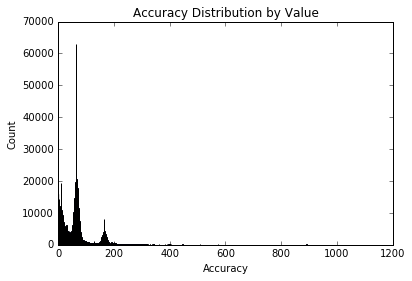

In [5]:
plt.hist(sample['accuracy'],1000)
plt.xlabel('Accuracy')
plt.ylabel('Count')
plt.title('Accuracy Distribution by Value')
plt.show()

In [45]:
#Ok so a few peaks but significant trail off after around 300. Not sure at this point what accuracy represents.
#Perhaps the degree of confidence we should place in the observation? 
#If we assume this is correct, it might mean a clearer signal once the inaccurate observations are removed.

In [46]:
len(data['place_id'].unique())

108390

In [47]:
#There are ~108K different location id's
#I assume each place will have it's own coordinate. I'd like to see if I can map a few of these

In [48]:
loc_1 = data[data.place_id==int(data['place_id'].sample())]
loc_2 = data[data.place_id==int(data['place_id'].sample())]
loc_3 = data[data.place_id==int(data['place_id'].sample())]

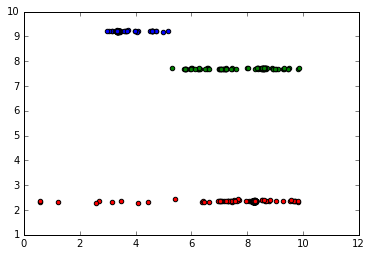

In [49]:
plt.scatter(loc_1['x'],loc_1['y'],c='blue')
plt.scatter(loc_2['x'],loc_2['y'],c='green')
plt.scatter(loc_3['x'],loc_3['y'],c='red')
plt.show()

In [152]:
var_test = pd.DataFrame(columns=('ID','Low_X_Var','High_X_Var','Low_Y_Var','High_Y_Var'))

for i in range(0,200):
    random_place = int(data['place_id'].sample())
    mean_acc = data[data.place_id==random_place].accuracy.mean()
    low_acc = data[data.place_id==random_place][data.accuracy<mean_acc]
    high_acc = data[data.place_id==random_place][data.accuracy>mean_acc]
    var_test.loc[i]=[random_place,low_acc.x.var(),high_acc.x.var(),low_acc.y.var(),high_acc.y.var()]


/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [50]:
#Interesting in that there's huge variance on the X-axis but very low variance on the y-axis
#I wonder if there's any relationship between this variance and accuracy

#To test this let's do the following. For every location_id let's split the data into a low accuracy group and 
#a high accuracy group. Then let's calculate the within-group variance. Finally let's subtract the two and
#look at the distribution.

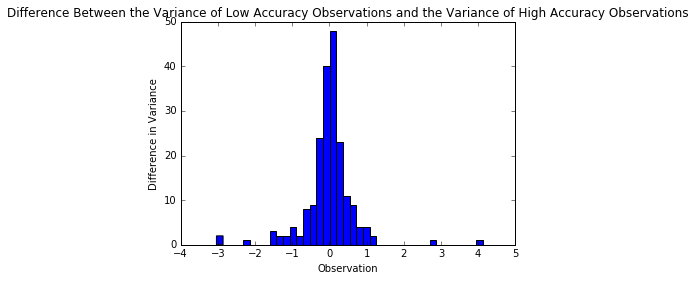

In [159]:
diff = var_test.Low_X_Var-var_test.High_X_Var
plt.hist(diff,bins=40)
#plt.plot(np.zeros(len(diff)),c='r')
plt.xlabel('Observation')
plt.ylabel('Difference in Variance')
plt.title('Difference Between the Variance of Low Accuracy Observations and the Variance of High Accuracy Observations')
plt.show()

In [351]:
#Looks pretty even distribution to me. If variance was always higher on low-accuracy observations, the graph
#would have been skewed positive. Also a lot of groups have essentially 0 difference in variance.

In [71]:
#It's worth noting that this analysis was probably not fantastic. variance could be heavily affected by outliers
#and differences in the number of observations between the two groups. It might be worth doing a better analysis of
#the relationship between location and accuracy. However, at the moment I'll move on.

In [75]:
#Let's shift gears and look at the time variable

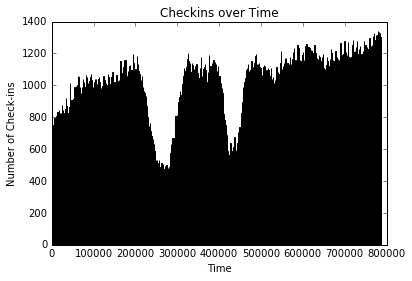

In [6]:
plt.hist(sample.time,bins=1000)
plt.xlabel('Time')
plt.ylabel('Number of Check-ins')
plt.title('Checkins over Time')
plt.show()

In [77]:
#Ok, so there's two big dip offs in time. At this point we're not sure what the time variable represents.
#Could be Minutes, Hours, etc.
#To start let's hypothesize that time is calculated in minutes

In [83]:
sample['hour']=(sample['time']/60)%24

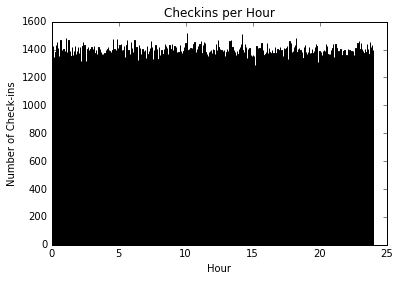

In [85]:
plt.hist(sample.hour,bins=1000)
plt.xlabel('Hour')
plt.ylabel('Number of Check-ins')
plt.title('Checkins per Hour')
plt.show()

In [87]:
#Ok so that's that hypothesis debunked. If it were true, there would be a dip around 4am.
#Maybe they're seconds?

In [88]:
sample['hour']=((sample['time']/60)/60)%24

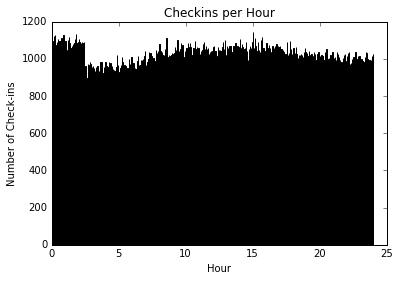

In [89]:
plt.hist(sample.hour,bins=1000)
plt.xlabel('Hour')
plt.ylabel('Number of Check-ins')
plt.title('Checkins per Hour')
plt.show()

In [90]:
#Eh probabaly not. What about the opposite direction? Try Hours?

In [7]:
sample['hour']=sample['time']%24

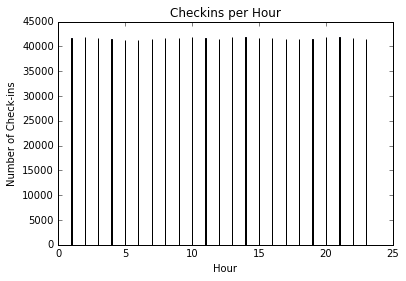

In [8]:
plt.hist(sample.hour,bins=1000)
plt.xlabel('Hour')
plt.ylabel('Number of Check-ins')
plt.title('Checkins per Hour')
plt.show()

In [9]:
#Ok so that's not right either
#Let's try comming back to this later

In [353]:
#Let's take a look at the map. Let's see if we can look at the different location clusters in a small section.
#If the map is 10km by 10km let's break it up into .5km by .5km

In [199]:
a_one = data[data.x<0.5][data.y<0.5]


/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [200]:
locations_for_each_place = []
for i in a_one['place_id'].unique():
    obs = [a_one[a_one.place_id==i]['x'],a_one[a_one.place_id==i]['y']]
    locations_for_each_place.append(obs)

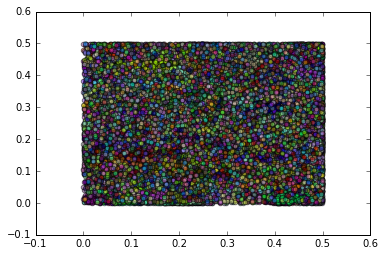

In [201]:
for loc in locations_for_each_place:
    rand_color = (np.random.uniform(0,1),np.random.uniform(0,1),np.random.uniform(0,1))
    plt.scatter(loc[0],loc[1],c=rand_color,alpha=0.5)
plt.show()

In [202]:
#Ok so these places are obviously really densly located. Let's define a function we can use to frame the window we want.

In [203]:
def get_view(x_left, x_right, y_bottom, y_top,data):    
    a_one = data[data.x<x_right][data.x>x_left][data.y<y_top][data.y>y_bottom]
    locations_for_each_place = []
    for i in a_one['place_id'].unique():
        obs = [a_one[a_one.place_id==i]['x'],a_one[a_one.place_id==i]['y']]
        locations_for_each_place.append(obs)
    for loc in locations_for_each_place:
        rand_color = (np.random.uniform(0,1),np.random.uniform(0,1),np.random.uniform(0,1))
        plt.scatter(loc[0],loc[1],c=rand_color,alpha=0.5)
    plt.show()

In [209]:
sample = data.sample(1000000)

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


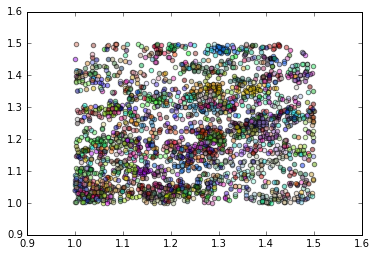

In [211]:
get_view(1,1.5,1,1.5,sample)

In [10]:
#Ok so here a bit of structure can be seen. At least a few clusters seem to be visible. 
#I wonder if this would be even clearer if we included only the most popular clusters

In [223]:
place_popularity = data[['place_id','time']].groupby('place_id').count()

In [235]:
top_forty = place_popularity.sort('time',ascending=0)[:40]

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [264]:
top_forty_data = pd.DataFrame(columns=data.columns.values)
for i in range(0,len(top_forty)):
    loc_data = data[data.place_id==top_forty.index[i]]
    top_forty_data = top_forty_data.append(loc_data)

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


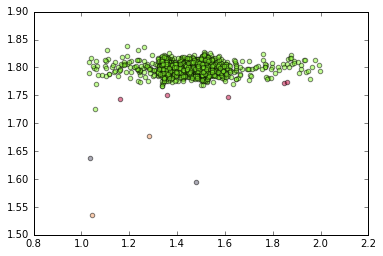

In [275]:
#Let's get a snapshot of an area
get_view(1,2,1.5,2,top_forty_data)

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


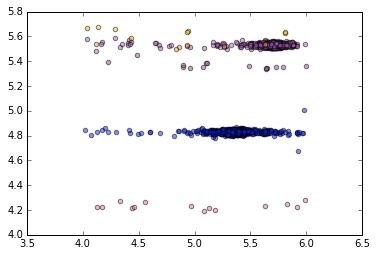

In [276]:
#And another
get_view(4,6,4,6,top_forty_data)

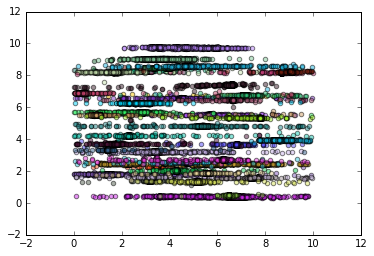

In [277]:
#Why not just the whole map?
get_view(0,10,0,10,top_forty_data)

In [282]:
 #Let's combine these two ideas and return only the most popular clusters in a given area
def get_popular_view(x_left, x_right, y_bottom, y_top,data): 
    
    a_one = data[data.x<x_right][data.x>x_left][data.y<y_top][data.y>y_bottom]
    
    place_popularity = a_one[['place_id','time']].groupby('place_id').count()
    
    top_10 = place_popularity.sort('time',ascending=0)[:10]
    top_10_data = pd.DataFrame(columns=a_one.columns.values)
    for i in range(0,len(top_10)):
        loc_data = a_one[a_one.place_id==top_10.index[i]]
        top_10_data = top_10_data.append(loc_data)
    
    locations_for_each_place = []
    for i in top_10_data['place_id'].unique():
        obs = [a_one[a_one.place_id==i]['x'],a_one[a_one.place_id==i]['y']]
        locations_for_each_place.append(obs)
    for loc in locations_for_each_place:
        rand_color = (np.random.uniform(0,1),np.random.uniform(0,1),np.random.uniform(0,1))
        plt.scatter(loc[0],loc[1],c=rand_color,alpha=0.5)
    plt.show()

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


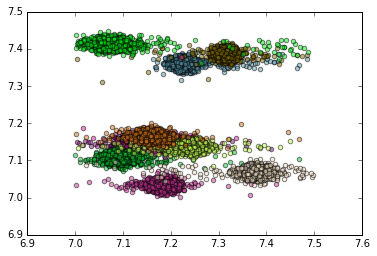

In [287]:
get_popular_view(7,7.5,7,7.5,data)

In [284]:
#Now that's looking prettier!

In [288]:
#Maybe the top 20 would be more informative?

In [289]:
def get_top_twenty(x_left, x_right, y_bottom, y_top,data): 
    
    a_one = data[data.x<x_right][data.x>x_left][data.y<y_top][data.y>y_bottom]
    
    place_popularity = a_one[['place_id','time']].groupby('place_id').count()
    
    top_10 = place_popularity.sort('time',ascending=0)[:20]
    top_10_data = pd.DataFrame(columns=a_one.columns.values)
    for i in range(0,len(top_10)):
        loc_data = a_one[a_one.place_id==top_10.index[i]]
        top_10_data = top_10_data.append(loc_data)
    
    locations_for_each_place = []
    for i in top_10_data['place_id'].unique():
        obs = [a_one[a_one.place_id==i]['x'],a_one[a_one.place_id==i]['y']]
        locations_for_each_place.append(obs)
    for loc in locations_for_each_place:
        rand_color = (np.random.uniform(0,1),np.random.uniform(0,1),np.random.uniform(0,1))
        plt.scatter(loc[0],loc[1],c=rand_color,alpha=0.5)
    plt.show()

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


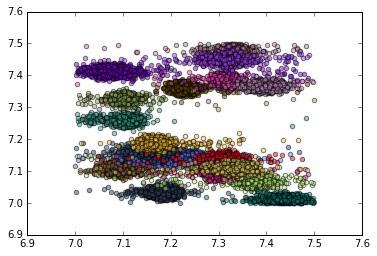

In [290]:
get_top_twenty(7,7.5,7,7.5,data)

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


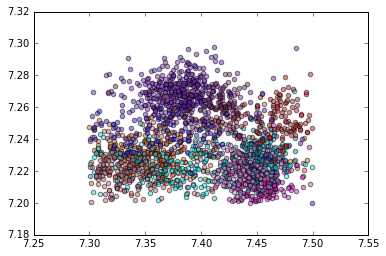

In [302]:
#There's a hole in that last chart around 7.5,7.2. Is it actually empty and safe to ignore? Or does it contain clusters?
get_popular_view(7.3,7.5,7.2,7.3,data)

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


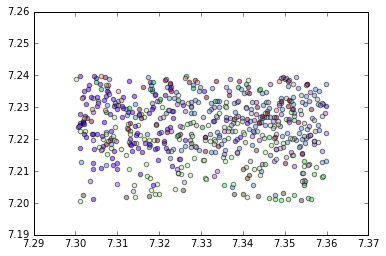

In [300]:
#Ok so it has some clusters as well. That beggs the question: How granular can we take this?
#Let's try and zoom in to that lower left hand side cluser around 7.33, 7.22
get_popular_view(7.3,7.36,7.2,7.24,data)

In [318]:
#At this zoomed in level, it's hard to get a sense of structure.
#I think the view above was more informative
#At least we now have a since of scale.

In [319]:
#Ok now assuming that a 0.1km^2 space will give a good sense of structure, I'm still curious about time.
#Can we somehow view the changes in the most popular clusters over time?
#We still don't have a good feel for how time maps to times in the day.
#Maybe by examining how check-ins change over time for the most popular loactions in a small area, this will be clearer

In [325]:
from mpl_toolkits.mplot3d import Axes3D

In [333]:
def most_pop_places_data_in_window(number_of_places, x_left, x_right, y_bottom, y_top, data):
    a_one = data[data.x<x_right][data.x>x_left][data.y<y_top][data.y>y_bottom]
    place_popularity = a_one[['place_id','time']].groupby('place_id').count()
    top_10 = place_popularity.sort('time',ascending=0)[:number_of_places]
    top_10_data = pd.DataFrame(columns=a_one.columns.values)
    for i in range(0,len(top_10)):
        loc_data = a_one[a_one.place_id==top_10.index[i]]
        top_10_data = top_10_data.append(loc_data)
    return top_10_data

In [335]:
time_data = most_pop_places_data_in_window(10,7.25,7.55,7.17,7.3,data)

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [343]:
def plot_3D(data):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('X Location')
    ax.set_ylabel('Y Location')
    ax.set_zlabel('Time')
    
    for place in data['place_id'].unique():
        p_slice = data[data.place_id==place]
        X = p_slice['x']
        Y = p_slice['y']
        Z = p_slice['time']
        color = (np.random.uniform(0,1),np.random.uniform(0,1),np.random.uniform(0,1))
        ax.scatter(X,Y,Z,c=color)    
    

plt.show()


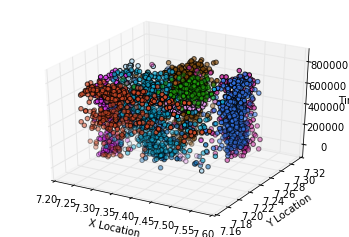

In [344]:
plot_3D(time_data)

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


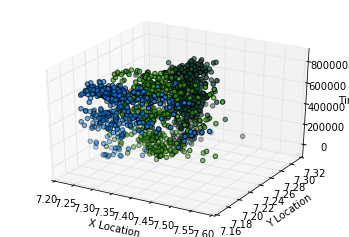

In [345]:
#Ok so it looks like there's some shape to these clusters that changes over time.
#To clarify this, let's cut down the number of clusters
time_data = most_pop_places_data_in_window(3,7.25,7.55,7.17,7.3,data)
plot_3D(time_data)

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


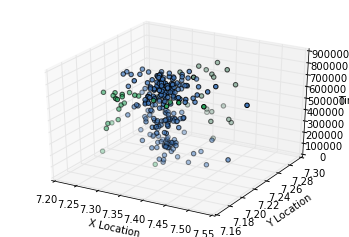

In [348]:
#Just to harp back on an idea from before, any chance a high accuracy cut off improves the shapes of these things?
time_data = most_pop_places_data_in_window(3,7.25,7.55,7.17,7.3,data)
time_data = time_data[time_data.accuracy>200]
plot_3D(time_data)

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


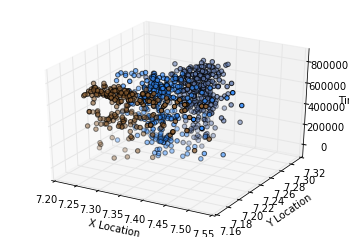

In [354]:
#Maybe a lower accuracy cut off?
time_data = most_pop_places_data_in_window(3,7.25,7.55,7.17,7.3,data)
time_data = time_data[time_data.accuracy>50]
plot_3D(time_data)

In [350]:
#Hmmm, not really. They're still all over the place. 
#Although it does look like there are some clusters where check-ins are a lot more accurate than others?

In [11]:
#Okay let's call it quits for the moment on data exploration.

In [14]:
######################## PRELIMINARY CONCLUSIONS ###############################################
#We can tentatively assume that local clusters exist and that their popularity changes over time. 
#We do not have a good model for what the time variable represents. At this point, we'll just treat 
#it as a 3rd diminsion without imbuing it with a whole lot of meaning.
#We don't have any clear understanding of how accuracy affects the check-ins for each cluster.
################################################################################################

In [12]:
######################## MODELING ##############################################################
#Now that we generally have a good sense of scale and generally know how the different location ids are clusterd
#Let's see if we can do some modeling and prediction.
################################################################################################

In [15]:
from sklearn import svm
from sklearn import cross_validation as cv
from sklearn import metrics

In [16]:
#We know from before that the map is very crowded with check-in data. This means a lot of points to consider.
#Kernel SVMs are computationally expensive, so I doubt they'll be very useful with this dataset.
#However, just to give them a go let's cut out a very small sub section of the map and see how well we can do
#on this micro-sample of the data. 

In [17]:
#Get some data from region
def get_data_from_region(x_left,x_right,y_bottom,y_top):
    return data[data.x<x_right][data.x>x_left][data.y<y_top][data.y>y_bottom]

In [18]:
#Get all the data contained in a 0.02km**2 area
sample_data = get_data_from_region(7.2,7.22,7.18,7.2)
sample_data = sample_data[['x','y','time','place_id']]

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


In [32]:
X_train, X_test, Y_train, Y_test = cv.train_test_split(sample_data[['x','y','time']],sample_data['place_id'], test_size=.5)

In [33]:
len(X_train)

39

In [34]:
model1 = svm.SVC(kernel='linear',C=1).fit(X_train,Y_train)

In [35]:
model1.score(X_test,Y_test)

0.30769230769230771

In [19]:
#About 30% accuracy on the cross validation test set. 
#Even so kernal svm is way too expensive to run on the full dataset

In [20]:
#Let's try something less computationally intensive like a K Nearest Neighbours.